In [4]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [25]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [26]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [52]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [48]:
def vectorize_sequences2(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for k in sequence:
            results[i, k] += 1.
    m = max([max(s) for s in results])
    results = results/m
    return results

x_train = vectorize_sequences2(train_data)
x_test = vectorize_sequences2(test_data)

In [28]:
x_train.shape

(25000, 10000)

In [42]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [56]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [57]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [58]:
history1 = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 176us/step - loss: 0.4934 - accuracy: 0.7886 - val_loss: 0.3205 - val_accuracy: 0.8764
Epoch 2/20
15000/15000 [==============================] - 3s 170us/step - loss: 0.2578 - accuracy: 0.8995 - val_loss: 0.2914 - val_accuracy: 0.8818
Epoch 3/20
15000/15000 [==============================] - 2s 166us/step - loss: 0.1768 - accuracy: 0.9318 - val_loss: 0.2848 - val_accuracy: 0.8878
Epoch 4/20
15000/15000 [==============================] - 3s 169us/step - loss: 0.1181 - accuracy: 0.9561 - val_loss: 0.3029 - val_accuracy: 0.8888
Epoch 5/20
15000/15000 [==============================] - 3s 170us/step - loss: 0.0887 - accuracy: 0.9685 - val_loss: 0.3293 - val_accuracy: 0.8788
Epoch 6/20
15000/15000 [==============================] - 2s 160us/step - loss: 0.0515 - accuracy: 0.9837 - val_loss: 0.3644 - val_accuracy: 0.8861
Epoch 7/20
15000/15000 [==============================] - 2s 1

In [60]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

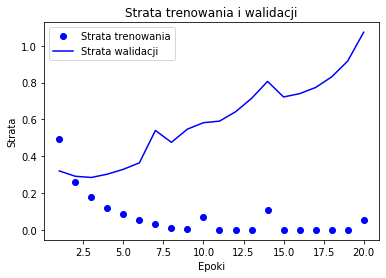

In [63]:
import matplotlib.pyplot as plt

acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()
plt.show()

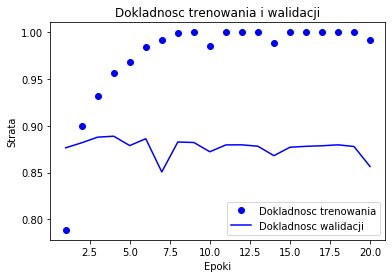

In [64]:
plt.clf()
acc_values = history1.history['accuracy']
val_acc_values = history1.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Dokladnosc trenowania')
plt.plot(epochs, val_acc, 'b', label='Dokladnosc walidacji')
plt.title('Dokladnosc trenowania i walidacji')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()
plt.show()